In [28]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO

In [2]:
### 영상 출력 함수
def fn_imshow(img, axis='on', **kwargs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(**kwargs)
    if axis!='on': plt.axis('off')
    plt.imshow(img_rgb)
    plt.show()

### ◼ Detect
- https://docs.ultralytics.com/tasks/detect/


In [29]:
# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

In [36]:
# Read an image using OpenCV
src = r"bus.jpg"
source = cv2.imread(src)
# Run inference on the source
results = model(source) # list of Results objects


0: 640x480 4 persons, 1 bus, 1 stop sign, 43.0ms
Speed: 1.0ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


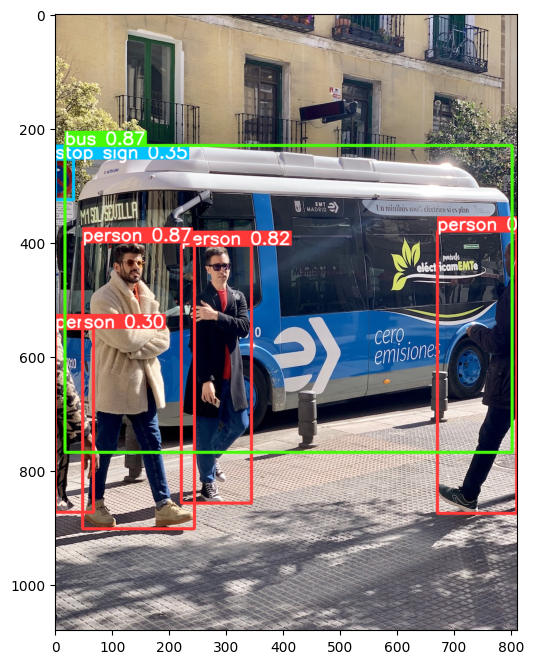

In [37]:
### Plotting result
res_plotted = results[0].plot()
fn_imshow(res_plotted, figsize=(6,8))

### ㅇ Boxes Properties
```py
boxes = results[0].boxes
```
- boxes.xyxy # box with xyxy format, (N, 4)
- boxes.xywh # box with xywh format, (N, 4)
- boxes.xyxyn # box with xyxy format but normalized, (N, 4)
- boxes.xywhn # box with xywh format but normalized, (N, 4)
- boxes.conf # confidence score, (N, )
- boxes.cls # cls, (N, )
- boxes.data # raw bboxes tensor, (N, 6) or boxes.boxes

In [38]:
# Boxes
boxes = results[0].boxes
# raw bboxes tensor, (N, 6) or boxes.boxes
boxes.data

tensor([[1.7286e+01, 2.3059e+02, 8.0152e+02, 7.6841e+02, 8.7055e-01, 5.0000e+00],
        [4.8739e+01, 3.9926e+02, 2.4450e+02, 9.0250e+02, 8.6898e-01, 0.0000e+00],
        [6.7027e+02, 3.8028e+02, 8.0986e+02, 8.7569e+02, 8.5360e-01, 0.0000e+00],
        [2.2139e+02, 4.0579e+02, 3.4472e+02, 8.5739e+02, 8.1931e-01, 0.0000e+00],
        [6.4341e-02, 2.5464e+02, 3.2288e+01, 3.2504e+02, 3.4607e-01, 1.1000e+01],
        [0.0000e+00, 5.5101e+02, 6.7105e+01, 8.7394e+02, 3.0129e-01, 0.0000e+00]])

In [39]:
### DataFrame
boxes_arr = boxes.data.cpu().numpy()
col_names = ['xMin', 'yMin', 'xMax', 'yMax', 'conf', 'class']
boxes_df = pd.DataFrame(boxes_arr, columns=col_names)
boxes_df

,xMin,yMin,xMax,yMax,conf,class
0,17.285751,230.592178,801.518311,768.405762,0.870545,5.0
1,48.739483,399.264008,244.501694,902.501221,0.868980,0.0
2,670.269348,380.284058,809.858154,875.690857,0.853604,0.0
3,221.393784,405.791718,344.717255,857.392029,0.819305,0.0
4,0.064341,254.644440,32.288464,325.039307,0.346069,11.0
5,0.000000,551.007874,67.104965,873.935608,0.301294,0.0


In [40]:
### class names - COCO dataset
ms_coco_classnames = {
  0: u'person',
  1: u'bicycle',
  2: u'car',
  3: u'motorcycle',
  4: u'airplane',
  5: u'bus',
  6: u'train',
  7: u'truck',
  8: u'boat',
  9: u'traffic light',
  10: u'fire hydrant',
  11: u'stop sign',
  12: u'parking meter',
  13: u'bench',
  14: u'bird',
  15: u'cat',
  16: u'dog',
  17: u'horse',
  18: u'sheep',
  19: u'cow',
  20: u'elephant',
  21: u'bear',
  22: u'zebra',
  23: u'giraffe',
  24: u'backpack',
  25: u'umbrella',
  26: u'handbag',
  27: u'tie',
  28: u'suitcase',
  29: u'frisbee',
  30: u'skis',
  31: u'snowboard',
  32: u'sports ball',
  33: u'kite',
  34: u'baseball bat',
  35: u'baseball glove',
  36: u'skateboard',
  37: u'surfboard',
  38: u'tennis racket',
  39: u'bottle',
  40: u'wine glass',
  41: u'cup',
  42: u'fork',
  43: u'knife',
  44: u'spoon',
  45: u'bowl',
  46: u'banana',
  47: u'apple',
  48: u'sandwich',
  49: u'orange',
  50: u'broccoli',
  51: u'carrot',
  52: u'hot dog',
  53: u'pizza',
  54: u'donut',
  55: u'cake',
  56: u'chair',
  57: u'couch',
  58: u'potted plant',
  59: u'bed',
  60: u'dining table',
  61: u'toilet',
  62: u'tv',
  63: u'laptop',
  64: u'mouse',
  65: u'remote',
  66: u'keyboard',
  67: u'cell phone',
  68: u'microwave',
  69: u'oven',
  70: u'toaster',
  71: u'sink',
  72: u'refrigerator',
  73: u'book',
  74: u'clock',
  75: u'vase',
  76: u'scissors',
  77: u'teddy bear',
  78: u'hair drier',
  79: u'toothbrush'
}

In [41]:
### Add class names
boxes_df['class'] = boxes_df['class'].astype('int')
boxes_df['class_nm'] = [ms_coco_classnames[i] for i in boxes_df['class']]
boxes_df

,xMin,yMin,xMax,yMax,conf,class,class_nm
0,17.285751,230.592178,801.518311,768.405762,0.870545,5,bus
1,48.739483,399.264008,244.501694,902.501221,0.868980,0,person
2,670.269348,380.284058,809.858154,875.690857,0.853604,0,person
3,221.393784,405.791718,344.717255,857.392029,0.819305,0,person
4,0.064341,254.644440,32.288464,325.039307,0.346069,11,stop sign
5,0.000000,551.007874,67.104965,873.935608,0.301294,0,person


### ◼ Segment

In [46]:
# Load a model
model = YOLO('yolov8s-seg.pt') # load an official model

100%|██████████| 22.8M/22.8M [00:02<00:00, 8.80MB/s]


In [47]:
# Read an image using OpenCV
src = r"bus.jpg"
source = cv2.imread(src)
# Run inference on the source
results = model(source) # list of Results objects


0: 640x480 4 persons, 1 bus, 1 tie, 1 skateboard, 106.3ms
Speed: 1.0ms preprocess, 106.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


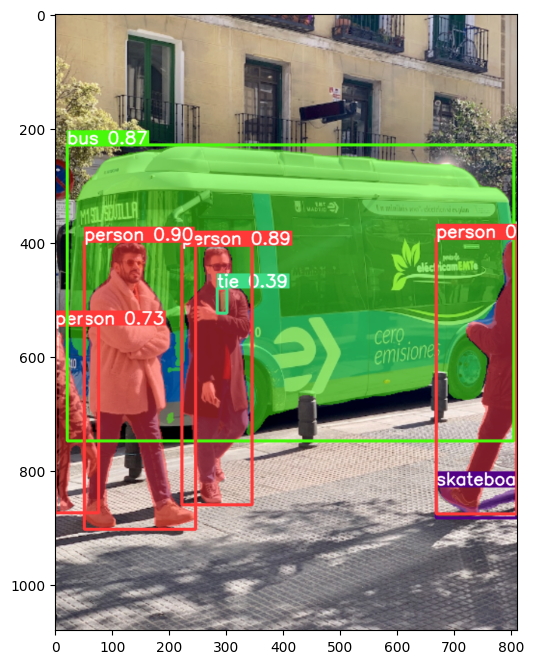

In [48]:
# Plotting results
res_plotted = results[0].plot()
fn_imshow(res_plotted, figsize=(6,8))

In [49]:
# Boxes
boxes = results[0].boxes
# raw bboxes tensor, (N, 6) or boxes.boxes
boxes.data

tensor([[5.1427e+01, 3.9802e+02, 2.4646e+02, 9.0317e+02, 9.0121e-01, 0.0000e+00],
        [6.6840e+02, 3.9336e+02, 8.0955e+02, 8.7632e+02, 8.8721e-01, 0.0000e+00],
        [2.2226e+02, 4.0550e+02, 3.4572e+02, 8.6009e+02, 8.8701e-01, 0.0000e+00],
        [2.1634e+01, 2.2947e+02, 8.0414e+02, 7.4868e+02, 8.7066e-01, 5.0000e+00],
        [3.1328e-01, 5.4515e+02, 7.6508e+01, 8.7436e+02, 7.3195e-01, 0.0000e+00],
        [2.8495e+02, 4.8044e+02, 3.0199e+02, 5.2454e+02, 3.9280e-01, 2.7000e+01],
        [6.6887e+02, 8.2729e+02, 8.0940e+02, 8.8368e+02, 3.0749e-01, 3.6000e+01]])

In [50]:
### DataFrame
boxes_arr = boxes.data.cpu().numpy()
col_names = ['xMin', 'yMin', 'xMax', 'yMax', 'conf', 'class']
boxes_df = pd.DataFrame(boxes_arr, columns=col_names)
boxes_df

,xMin,yMin,xMax,yMax,conf,class
0,51.427036,398.018860,246.464859,903.167908,0.901208,0.0
1,668.404724,393.357727,809.546509,876.316467,0.887206,0.0
2,222.262985,405.503998,345.716736,860.085754,0.887007,0.0
3,21.634432,229.473633,804.144470,748.678345,0.870664,5.0
4,0.313278,545.153442,76.507675,874.360962,0.731946,0.0
5,284.954987,480.438904,301.994202,524.535950,0.392800,27.0
6,668.869019,827.294800,809.403015,883.677551,0.307494,36.0


In [51]:
### Add class names
boxes_df['class'] = boxes_df['class'].astype('int')
boxes_df['class_nm'] = [ms_coco_classnames[i] for i in boxes_df['class']]
boxes_df

,xMin,yMin,xMax,yMax,conf,class,class_nm
0,51.427036,398.018860,246.464859,903.167908,0.901208,0,person
1,668.404724,393.357727,809.546509,876.316467,0.887206,0,person
2,222.262985,405.503998,345.716736,860.085754,0.887007,0,person
3,21.634432,229.473633,804.144470,748.678345,0.870664,5,bus
4,0.313278,545.153442,76.507675,874.360962,0.731946,0,person
5,284.954987,480.438904,301.994202,524.535950,0.392800,27,tie
6,668.869019,827.294800,809.403015,883.677551,0.307494,36,skateboard


### ㅇ Masks
```py
masks = results[0].masks
```
- masks.xy # x, y segments (pixels), List[segment] * N
- masks.xyn # x, y segments (normalized), List[segment] * N
- masks.data # raw masks tensor, (N, H, W) or masks.masks

In [52]:
# Masks object
masks = results[0].masks

# x, y segments (pixels), List[segment] * N
for i in range(len(masks)):
    print(i, ":", len(masks.xy[i]), "points.")

0 : 346 points.
1 : 246 points.
2 : 192 points.
3 : 598 points.
4 : 138 points.
5 : 16 points.
6 : 90 points.


### ◼ Classify

In [53]:
# Load a model
model = YOLO('yolov8n-cls.pt') # load an official model

In [54]:
# Read an image using OpenCV
src = r"bus.jpg"
source = cv2.imread(src)
# Predict with the model
results = model(source) # predict on an image


0: 224x224 minibus 0.43, police_van 0.29, ambulance 0.06, recreational_vehicle 0.04, bullet_train 0.03, 30.0ms
Speed: 1.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


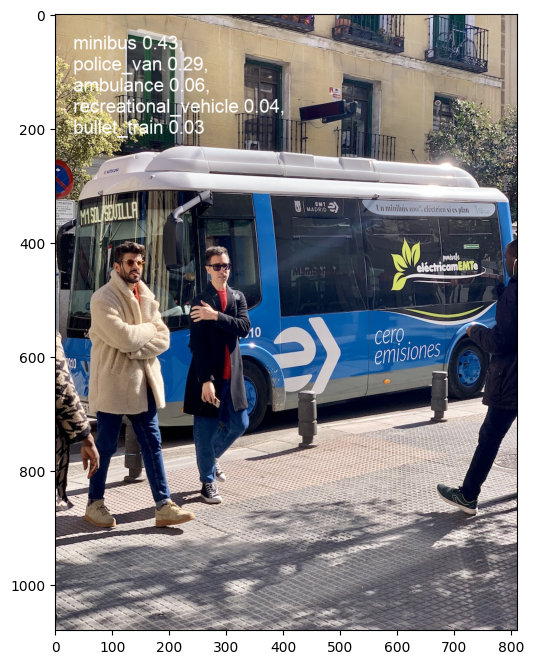

In [55]:
# Plotting results
res_plotted = results[0].plot()
fn_imshow(res_plotted, figsize=(6,8))

### ㅇ Probs
```py
probs = results[0].probs
```
- probs.top5 # The top5 indices of classification, List[Int] * 5.
- probs.top1 # The top1 indices of classification, a value with Int type.
- probs.top5conf # The top5 scores of classification, a tensor with shape (5, ).
- probs.top1conf # The top1 scores of classification. a value with torch.tensor type.
- probs.data # raw probs tensor, (num_class, )

In [56]:
### Probs
probs = results[0].probs
# top5
probs.top5, probs.top5conf

([654, 734, 407, 757, 466], tensor([0.4338, 0.2900, 0.0580, 0.0438, 0.0275]))

### ◼ Pose

In [58]:
# Load a model
model = YOLO('yolov8n-pose.pt') # load an official model

In [59]:
# Read an image using OpenCV
src = r"bus.jpg"
source = cv2.imread(src)
# Predict with the model
results = model(source) # predict on an image



0: 640x480 4 persons, 46.0ms
Speed: 2.0ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


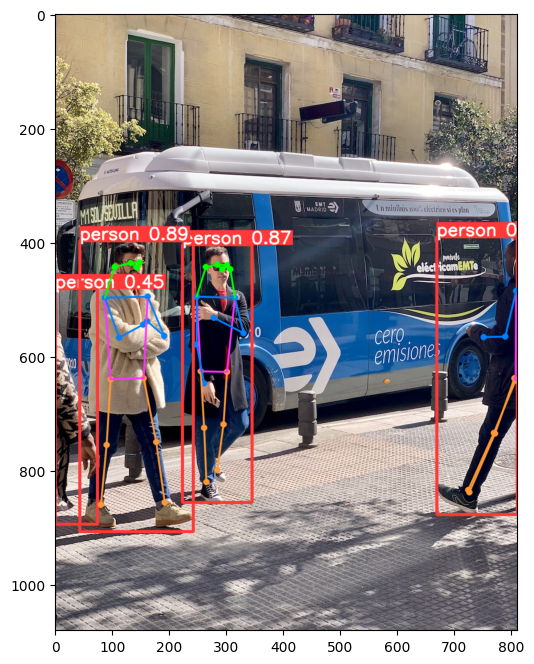

In [60]:
# Plotting results
res_plotted = results[0].plot()
fn_imshow(res_plotted, figsize=(6,8))

### ㅇKeypoints
```py 
keypoints = results[0].keypoints
``````

- keypoints.xy # x, y keypoints (pixels), (num_dets, num_kpts, 2/3), the last dimension can be 2 or 3,
- depends the model.
- keypoints.xyn # x, y keypoints (normalized), (num_dets, num_kpts, 2/3)
- keypoints.conf # confidence score(num_dets, num_kpts) of each keypoint if the last dimension is 3.
- keypoints.data # raw keypoints tensor, (num_dets, num_kpts, 2/3)

In [61]:
# Keypoints object
keypoints = results[0].keypoints
# array - [x, y keypoints (pixels), confidence score]
keypoints_arr = keypoints.data.cpu().numpy()
keypoints_arr[0]


array([[     143.37,      444.84,     0.98033],
       [     148.27,      435.67,     0.90446],
       [     132.06,      436.29,     0.96188],
       [          0,           0,     0.42136],
       [     104.57,      443.18,     0.81452],
       [     162.94,      495.44,     0.98596],
       [     87.641,      497.77,     0.98956],
       [     191.12,      564.78,     0.95277],
       [     112.46,      567.08,     0.96945],
       [      161.6,      538.21,     0.93321],
       [     154.78,      544.96,     0.95317],
       [     155.64,      638.87,     0.99362],
       [     97.047,      640.84,     0.99429],
       [      177.8,      750.85,     0.98805],
       [     90.312,      755.77,     0.98971],
       [     192.43,      856.78,     0.94734],
       [     80.582,       860.9,     0.95094]], dtype=float32)

### ▢ Track
- https://docs.ultralytics.com/modes/track/
- 개체 추적(Object tracking)은 개체의 위치와 클래스를 식별한 다음 비디오 스트림에서 해당 감지에
고유 ID를 할당하는 작업
- Detect, Segment, Pose 모델에 사용
### ◼ 추적 알고리즘
- BoT-SORT(default tracker)
- ByteTrack
### ◼ 실시간 CCTV 영상 자료
- 국가교통정보센터(OpenAPI)
    - https://www.its.go.kr/
- 도시교통정보센터(OpenAPI)
    - https://www.utic.go.kr/
- 대전교통정보센터(download)
    - http://traffic.daejeon.go.kr/traffic/cctv
    - CCTV 화면에서 우클릭 > 동영상 경로 복사 또는 다운로드 가능

In [62]:
# Load a pretrained YOLOv8n model
model = YOLO('YOLOv8n.pt')

In [66]:
# 대전교통정보센터 - 중앙로역네거리
# Predict with the model
src = 'http://210.99.67.118/media/CTV0002/CTV0002_20231116.094600.000.mp4'
results = model.track(src, save=True, verbose=False)

100%|██████████| 1.84M/1.84M [00:00<00:00, 7.89MB/s]

WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to runs\detect\predict2


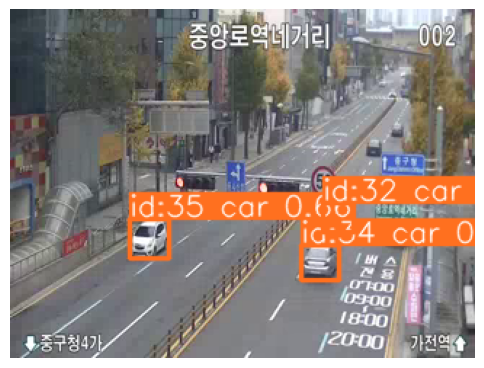

In [67]:
# Plotting results
idx = 721+1
res_plotted = results[idx].plot()
fn_imshow(res_plotted, figsize=(6,8), axis='')

In [68]:
# Boxes
boxes = results[idx].boxes
boxes.data.cpu().numpy()

array([[     215.12,      133.98,      236.75,      153.78,          32,     0.75368,           2],
       [     200.04,      162.56,      226.06,      186.27,          34,     0.53938,           2],
       [     82.655,      144.92,      109.22,      171.24,          35,     0.66171,           2]], dtype=float32)

In [69]:
### DataFrame
boxes_arr = boxes.data.cpu().numpy()
col_names = ['xMin', 'yMin', 'xMax', 'yMax', 'ID', 'conf', 'class']
boxes_df = pd.DataFrame(boxes_arr, columns=col_names)
boxes_df

,xMin,yMin,xMax,yMax,ID,conf,class
0,215.122360,133.979797,236.754120,153.777267,32.0,0.753683,2.0
1,200.037796,162.561890,226.062637,186.270035,34.0,0.539382,2.0
2,82.655365,144.922729,109.216812,171.235306,35.0,0.661711,2.0


In [70]:
### Add class names
boxes_df[['ID', 'class']] = boxes_df[['ID', 'class']].astype('int')
boxes_df['class_nm'] = [ms_coco_classnames[i] for i in boxes_df['class']]
boxes_df

,xMin,yMin,xMax,yMax,ID,conf,class,class_nm
0,215.122360,133.979797,236.754120,153.777267,32,0.753683,2,car
1,200.037796,162.561890,226.062637,186.270035,34,0.539382,2,car
2,82.655365,144.922729,109.216812,171.235306,35,0.661711,2,car
